In [8]:
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
mpl.rc('axes', labelsize=12)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

from mpl_toolkits.mplot3d import Axes3D

from sklearn import datasets
from sklearn.datasets import make_moons

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score

In [2]:
PROJECT_ROOT_DIR = r"C:\Users\19673418\Desktop\Repository\ADA874\Chapter 7"
CHAPTER_ID = "Chapter5SVM"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [14]:
def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], "bo")
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], "ro")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=12)
    plt.ylabel(r"$x_2$", fontsize=12, rotation=0)

In [16]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(x).reshape(x0.shape)
    y_decision = clf.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.bwr, alpha=0.1)

In [3]:
p_heads = 0.51
coin_toss = (np.random.rand(10000, 10) < p_heads).astype(np.int32)
r_heads_cum = np.cumsum(coin_toss, axis = 0) / np.arange(1, 10001).reshape(-1, 1)

Saving figure Law Of Large Numbers


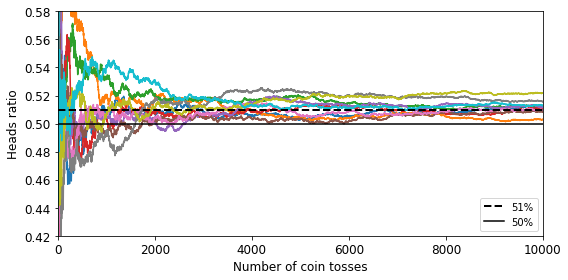

In [4]:
plt.figure(figsize=(8, 4))
plt.plot(r_heads_cum)
plt.plot([0, 10000], [0.51, 0.51], "k--", linewidth=2, label="51%")
plt.plot([0, 10000], [0.5, 0.5], "k-", label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads ratio")
plt.legend(loc="lower right")
plt.axis([0, 10000, 0.42, 0.58])
save_fig("Law Of Large Numbers")
plt.show()

In [5]:
x, y = make_moons(n_samples=500, noise=0.30, random_state=42)
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [17]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(x_train, y_train)
y_pred = bag_clf.predict(x_test)

In [9]:
print(accuracy_score(y_test, y_pred))

0.904


In [10]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(x_train, y_train)
y_pred_tree = tree_clf.predict(x_test)

In [11]:
print(accuracy_score(y_test, y_pred_tree))

0.856


AttributeError: 'DecisionTreeClassifier' object has no attribute 'decision_function'

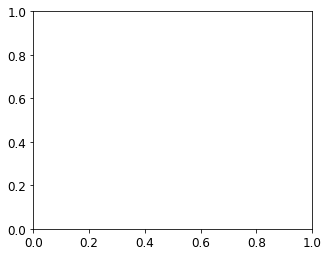

In [18]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plot_predictions(tree_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=3, r=1, C=5$", fontsize=12)

plt.subplot(122)
plot_predictions(bag_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(x, y, [-1.5, 2.5, -1, 1.5])
plt.title(r"$d=10, r=100, C=5$", fontsize=12)

save_fig("DT with(out) Bagging")
plt.show()

In [ ]:
iris = datasets.load_iris()
x = iris["data"][:, (2, 3)]
y = iris["target"]

setosa_or_versicolor = (y == 0) | (y == 1)
x = x[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [ ]:
x = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

In [ ]:
x1D = np.linspace(-4, 4, 9).reshape(-1, 1)
x2D = np.c_[x1D, x1D**2]
y = np.array([0, 0, 1, 1, 1, 1, 1, 0, 0])

plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.axhline(y=0, color='k')
plt.plot(x1D[:, 0][y == 0], np.zeros(4), "bo")
plt.plot(x1D[:, 0][y == 1], np.zeros(5), "ro")
plt.gca().get_yaxis().set_ticks([])
plt.xlabel(r"$x_1$", fontsize=12)
plt.axis([-4.5, 4.5, -0.2, 0.2])

plt.subplot(122)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.plot(x2D[:, 0][y == 0], x2D[:, 1][y == 0], "bo")
plt.plot(x2D[:, 0][y == 1], x2D[:, 1][y == 1], "ro")
plt.xlabel(r"$x_1$", fontsize=12)
plt.ylabel(r"$x_2$", fontsize=12, rotation=0)
plt.gca().get_yaxis().set_ticks([0, 4, 8, 12, 16])
plt.plot([-4.5, 4.5], [6.5, 6.5], "k--", linewidth=2)
plt.axis([-4.5, 4.5, -1, 17])

plt.subplots_adjust(right=1)

save_fig("Adding Nonlinear Features", tight_layout=False)
plt.show()

In [ ]:
x, y = make_moons(n_samples=100, noise=0.15, random_state=42)

In [ ]:
def plot_dataset(x, y, axes):
    plt.plot(x[:, 0][y == 0], x[:, 1][y == 0], "bo")
    plt.plot(x[:, 0][y == 1], x[:, 1][y == 1], "ro")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=12)
    plt.ylabel(r"$x_2$", fontsize=12, rotation=0)

In [ ]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    x = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(x).reshape(x0.shape)
    y_decision = clf.decision_function(x).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.bwr, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.bwr, alpha=0.1)

In [ ]:
np.random.seed(42)
m = 100
x = 2 * np.random.rand(m, 1) - 1
y = (0.2 + 0.1 * x + 0.5 * x**2 + np.random.randn(m, 1)/10).ravel()

In [ ]:
iris = datasets.load_iris()
x = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)